In [29]:

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr
from sklearn.neighbors import LocalOutlierFactor
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [30]:
url= 'https://raw.githubusercontent.com/meganbougle/Pizza-Dataset/main/pizza_sales.csv'
df = pd.read_csv(url)


In [31]:
df.head()

,pizza_id,order_id,pizza_name_id,quantity,order_date,order_time,unit_price,total_price,pizza_size,pizza_category,pizza_ingredients,pizza_name
0,1.0,1.0,hawaiian_m,1.0,1/1/2015,11:38:36,13.25,13.25,M,Classic,"Sliced Ham, Pineapple, Mozzarella Cheese",The Hawaiian Pizza
1,2.0,2.0,classic_dlx_m,1.0,1/1/2015,11:57:40,16.00,16.00,M,Classic,"Pepperoni, Mushrooms, Red Onions, Red Peppers,...",The Classic Deluxe Pizza
2,3.0,2.0,five_cheese_l,1.0,1/1/2015,11:57:40,18.50,18.50,L,Veggie,"Mozzarella Cheese, Provolone Cheese, Smoked Go...",The Five Cheese Pizza
3,4.0,2.0,ital_supr_l,1.0,1/1/2015,11:57:40,20.75,20.75,L,Supreme,"Calabrese Salami, Capocollo, Tomatoes, Red Oni...",The Italian Supreme Pizza
4,5.0,2.0,mexicana_m,1.0,1/1/2015,11:57:40,16.00,16.00,M,Veggie,"Tomatoes, Red Peppers, Jalapeno Peppers, Red O...",The Mexicana Pizza


In [32]:
df.shape

(48620, 12)

In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48620 entries, 0 to 48619
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   pizza_id           48620 non-null  float64
 1   order_id           48620 non-null  float64
 2   pizza_name_id      48620 non-null  object 
 3   quantity           48620 non-null  float64
 4   order_date         48620 non-null  object 
 5   order_time         48620 non-null  object 
 6   unit_price         48620 non-null  float64
 7   total_price        48620 non-null  float64
 8   pizza_size         48620 non-null  object 
 9   pizza_category     48620 non-null  object 
 10  pizza_ingredients  48620 non-null  object 
 11  pizza_name         48620 non-null  object 
dtypes: float64(5), object(7)
memory usage: 4.5+ MB


In [34]:
estadistcas= df['quantity'].describe()
moda= df['quantity'].mode()


In [35]:

media = df[['quantity', 'unit_price', 'total_price']].mean()
mediana = df[['quantity', 'unit_price', 'total_price']].median()
std = df[['quantity', 'unit_price', 'total_price']].std()
modanum = df[['quantity', 'unit_price', 'total_price']].mode().iloc[0]
modacat = df[['pizza_size', 'pizza_category', 'pizza_ingredients', 'pizza_name']].mode().iloc[0]


In [36]:

#DataFrame para las estadísticas numéricas
estadisticas_manual_num = pd.DataFrame({
    'Media': media,
    'Mediana': mediana,
    'Moda': modanum,
    'Dev Std': std
})


print("Estadísticas para columnas numéricas:")
print(estadisticas_manual_num)

print("\nModa para columnas categóricas:")
print(modacat)


Estadísticas para columnas numéricas:
                 Media  Mediana   Moda   Dev Std
quantity      1.019622      1.0   1.00  0.143077
unit_price   16.494132     16.5  20.75  3.621789
total_price  16.821474     16.5  20.75  4.437398

Moda para columnas categóricas:
pizza_size                                                           L
pizza_category                                                 Classic
pizza_ingredients    Pepperoni, Mushrooms, Red Onions, Red Peppers,...
pizza_name                                    The Classic Deluxe Pizza
Name: 0, dtype: object


In [37]:
tabla_frecuencia_pizza_size = df['pizza_size'].value_counts()
print("Tabla de Frecuencia para Pizza Size:")
print(tabla_frecuencia_pizza_size)


Tabla de Frecuencia para Pizza Size:
pizza_size
L      18526
M      15385
S      14137
XL       544
XXL       28
Name: count, dtype: int64


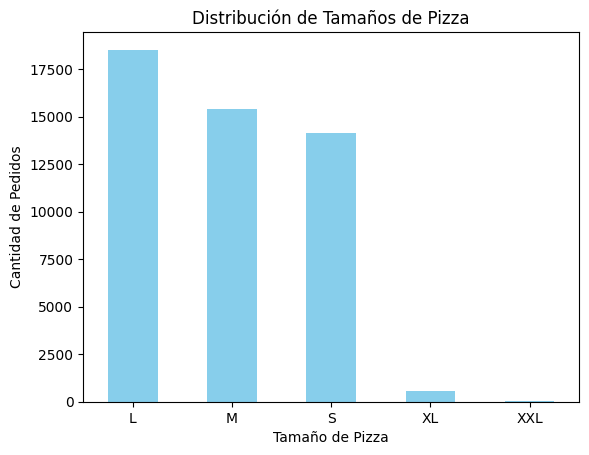

In [38]:
#Graficos
df['pizza_size'].value_counts().plot(kind='bar', color='skyblue')
plt.title('Distribución de Tamaños de Pizza')
plt.xlabel('Tamaño de Pizza')
plt.ylabel('Cantidad de Pedidos')
plt.xticks(rotation=0)
plt.show()

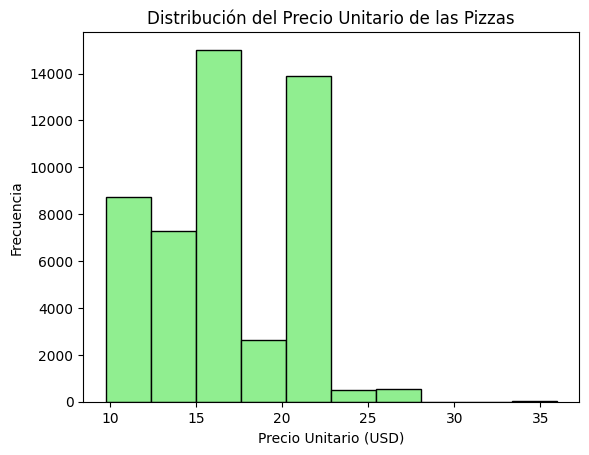

In [39]:
#Histograma
df['unit_price'].plot(kind='hist', bins=10, color='lightgreen', edgecolor='black')
plt.title('Distribución del Precio Unitario de las Pizzas')
plt.xlabel('Precio Unitario (USD)')
plt.ylabel('Frecuencia')
plt.show()

Correlación entre 'quantity' y 'total_price': 0.5419262253695513


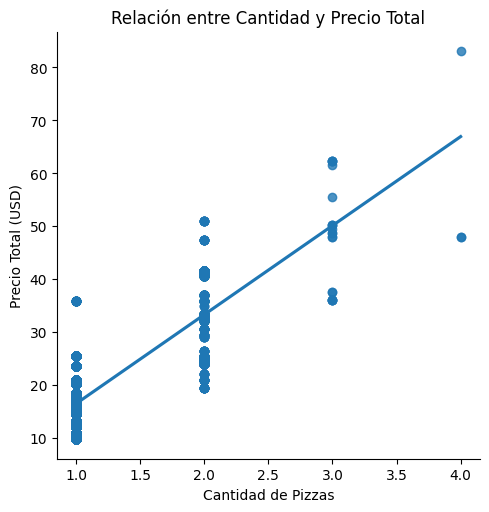

In [40]:
correlacion, _ = pearsonr(df['quantity'], df['total_price'])
print(f"Correlación entre 'quantity' y 'total_price': {correlacion}")

# Gráfico de dispersión con línea de regresión
sns.lmplot(x='quantity', y='total_price', data=df, ci=None)
plt.title('Relación entre Cantidad y Precio Total')
plt.xlabel('Cantidad de Pizzas')
plt.ylabel('Precio Total (USD)')
plt.show()

Mapa de codificación para tamaños de pizza:
0: L
1: M
2: S
3: XL
4: XXL


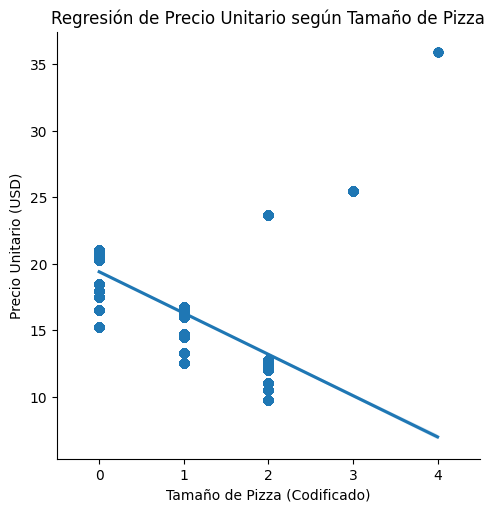

In [41]:
df['pizza_size_num'] = pd.Categorical(df['pizza_size']).codes

size_mapping = pd.Categorical(df['pizza_size']).categories
size_mapping_dict = dict(enumerate(size_mapping))

#verificando a que numero pertence cada tamaño de pizza
print("Mapa de codificación para tamaños de pizza:")
for code, size in size_mapping_dict.items():
    print(f"{code}: {size}")

# gráfico de dispersión con línea de regresión ajustada
sns.lmplot(x='pizza_size_num', y='unit_price', data=df)
plt.xlim(-0.5, len(pd.Categorical(df['pizza_size']).categories) - 0.5)
plt.title('Regresión de Precio Unitario según Tamaño de Pizza')
plt.xlabel('Tamaño de Pizza (Codificado)')
plt.ylabel('Precio Unitario (USD)')
plt.show()

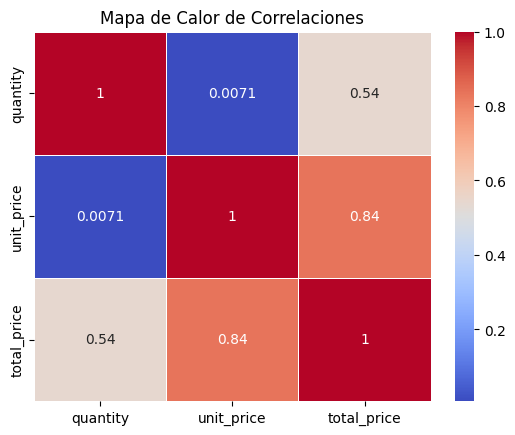

In [42]:
vnumericas = df[['quantity', 'unit_price', 'total_price']].corr()

sns.heatmap(vnumericas, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Mapa de Calor de Correlaciones')
plt.show()

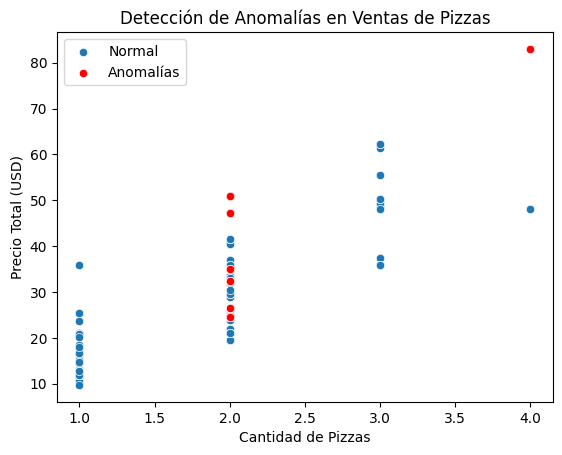

In [43]:

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Aplicar LOF para detectar anomalías
lof = LocalOutlierFactor(n_neighbors=20)
df['anomaly'] = lof.fit_predict(X_scaled)

# Filtrar para las anomalías
anomalies = df[df['anomaly'] == -1]

sns.scatterplot(x='quantity', y='total_price', data=df, label='Normal')
sns.scatterplot(x='quantity', y='total_price', data=anomalies, color='red', label='Anomalías')
plt.title('Detección de Anomalías en Ventas de Pizzas')
plt.xlabel('Cantidad de Pizzas')
plt.ylabel('Precio Total (USD)')
plt.legend()
plt.show()